# Lab1 exercises 1

### Iris dataset

#### Exercise 1.1
Load the previously downloaded Iris dataset as a list of lists (each of the 150 lists should have 5 elements). You can make use of the csv module presented. You can read more about the csv module on the official documentation.

In [1]:
!test -e iris.csv || wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" -O iris.csv

In [2]:
import csv

dataset = [ [], [], [], [], [] ]
measurements = [ "sepal length", "sepal width", "petal length", "petal width" ]
with open("iris.csv") as f:
    for row in csv.reader(f):
        if len(row) == 5: # only do this if the number of columns is 5, as expected
            for i in range(4): # the 4 measurements should be converted to float
                dataset[i].append(float(row[i]))
            # position 4 is the iris type, which is to be kept as a string
            dataset[4].append(row[4])

In [3]:
flower_idx = 0
print(dataset[0][flower_idx], dataset[1][flower_idx], dataset[2][flower_idx], dataset[3][flower_idx], dataset[4][flower_idx])

5.1 3.5 1.4 0.2 Iris-setosa


#### Exercise 1.2
Compute and print the mean and the standard deviation for each of the 4 measurement columns (i.e. sepal length and width, petal length and width). Remember that, for a given list of n values x = (x1, x2, ..., xn), the mean μ and the standard deviation σ are defined respectively as:

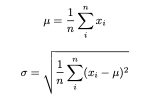

In [4]:
# Mean of a list
def mean(l):
    return sum(l) / len(l)

In [5]:
# Standard deviation of a list
def std(l):
    u = mean(l)
    return mean([(x_i - u) ** 2 for x_i in l]) ** 0.5 # ^0.5 instead of sqrt 

In [6]:
for i, m in enumerate(measurements):
    print(f"{m} mean {mean(dataset[i]):.4f} std {std(dataset[i]):.4f}")

sepal length mean 5.8433 std 0.8253
sepal width mean 3.0540 std 0.4321
petal length mean 3.7587 std 1.7585
petal width mean 1.1987 std 0.7606


#### Exercise 1.3
Compute and print the mean and the standard deviation for each of the 4 measurement columns, separately for each of the three Iris species (versicolor, virginica and setosa).

In [7]:
iris_types = set(dataset[4])
iris_types

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [8]:
for idx_m, m in enumerate(measurements):
    print(m)
    for flower in iris_types:
        # print(flower)
        measure_data = []
        for idx_f, f in enumerate(dataset[idx_m]):
            if dataset[4][idx_f] == flower:
                measure_data.append(dataset[idx_m][idx_f])
        print(f"{flower} mean {mean(measure_data):.4f} std {std(measure_data):.4f}")
    print()

sepal length
Iris-versicolor mean 5.9360 std 0.5110
Iris-virginica mean 6.5880 std 0.6295
Iris-setosa mean 5.0060 std 0.3489

sepal width
Iris-versicolor mean 2.7700 std 0.3106
Iris-virginica mean 2.9740 std 0.3193
Iris-setosa mean 3.4180 std 0.3772

petal length
Iris-versicolor mean 4.2600 std 0.4652
Iris-virginica mean 5.5520 std 0.5463
Iris-setosa mean 1.4640 std 0.1718

petal width
Iris-versicolor mean 1.3260 std 0.1958
Iris-virginica mean 2.0260 std 0.2719
Iris-setosa mean 0.2440 std 0.1061



#### Exercise 1.4
(*) Based on the results of exercises 2 and 3, which of the 4 measurements would you considering as being the most characterizing one for the three species? (In other words, which measurement would you consider “best”, if you were to guess the Iris species based only on those four values?)

Based on the previous results, the measurement that most helps discriminate among the three Iris types is the one that has the most distant means and the smallest standard deviations.
This corresponds to distributions of values that are well separated (distant means) and all fall within a short distance on the mean value (small standard deviation).
At a first look at the previous values, the one that jumps out is the petal width. The means are well separated (approximately 0.2, 1.3 and 2.0) and the standard deviations are low (all below 0.27).
A visual aid might help with this kind of considerations. Although not yet introduced, the following code will plot a bell curve and the actual histograms for each of the three Iris types, for each of the measurements. The means and standard deviations of the curves are the one previously computed.

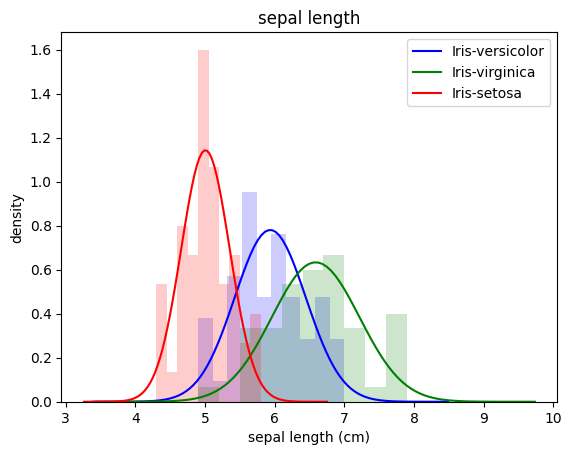

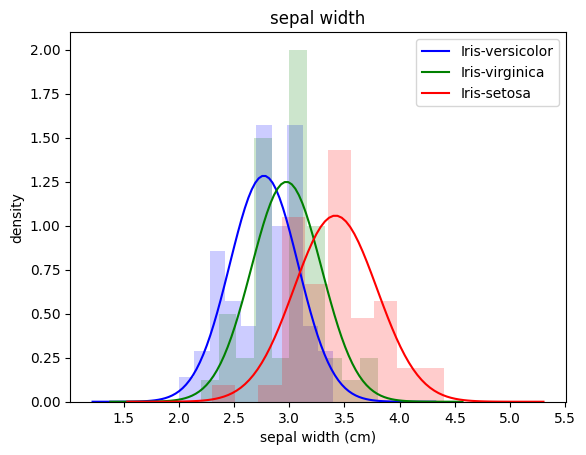

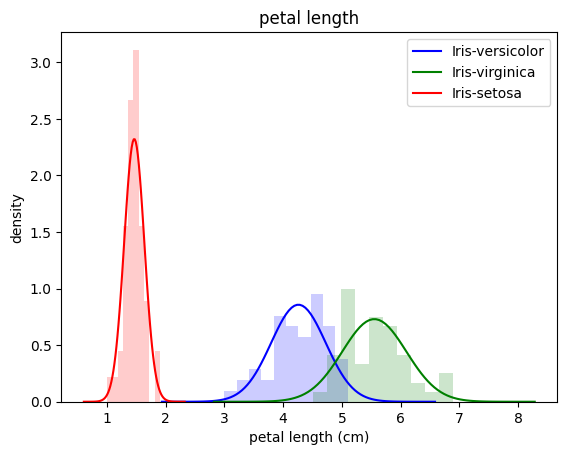

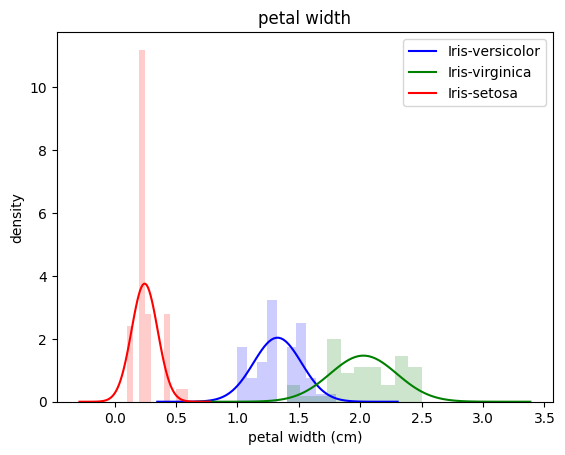

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import numpy as np

colors = ['b','g','r']
for i, m in enumerate(measurements):
    plt.figure()
    plt.title(m)
    for iris_type, color in zip(iris_types, colors):
        # For each measurement and for each type of iris, build a list of values
        values = [ v for v,t in zip(dataset[i], dataset[4]) if t == iris_type ]
        plt.hist(values, density=True, alpha=0.2, color=color)
        u = mean(values)
        s = std(values)
        x = np.linspace(u-5*s, u+5*s, 100)
        plt.plot(x, norm(u,s).pdf(x), label=iris_type, color=color)
        plt.xlabel(f"{m} (cm)")
        plt.ylabel("density")
    plt.legend()